In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import t
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 

In [92]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [93]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg=1)

    return bs_slope_reps, bs_intercept_reps

In [94]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [95]:
draft_df = pd.read_csv('career_df_2006.csv')

In [96]:
draft_df.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)',
       'Shuttle', '3Cone', 'Win-Loss Record', 'Round', 'Pick', 'Team', 'Age',
       'To', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'Solo', 'Int', 'Sacks',
       'Drafted'],
      dtype='object')

In [97]:
draft_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,5.08,22.0,27.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
1,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,5.12,15.0,30.5,103.0,...,2009.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,D
2,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,4.74,NaN,38.5,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,4.88,22.0,32.0,112.0,...,2009.0,0.0,0.0,2.0,13.0,13.0,109.0,NaN,3.0,D
4,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,4.41,17.0,39.5,131.0,...,2012.0,0.0,0.0,1.0,13.0,9.0,213.0,15.0,NaN,D


In [98]:
draft_df[draft_df['POS'] == 'CB']

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted
10,2006.0,Eric Bassey,Oklahoma,CB,71.88,195.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
11,2006.0,Brett Bell,Wisconsin,CB,72.25,190.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
15,2006.0,Will Blackmon,Boston College,CB,72.25,198.0,4.49,NaN,41.0,133.0,...,2016.0,0.0,0.0,2.0,18.0,5.0,159.0,4.0,3.5,D
24,2006.0,Dion Byrum,Ohio,CB,71.00,192.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
29,2006.0,Antonio Cromartie,Florida State,CB,74.13,208.0,4.50,18.0,38.0,132.0,...,2016.0,1.0,4.0,8.0,61.0,24.0,376.0,31.0,NaN,D
44,2006.0,Cortland Finnegan,Samford (AL),CB,69.88,188.0,NaN,NaN,NaN,NaN,...,2015.0,1.0,1.0,7.0,52.0,42.0,541.0,18.0,7.0,D
45,2006.0,Gabriel Fulbright,New Mexico,CB,69.63,169.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
49,2006.0,Charles Gordon,Kansas,CB,70.13,183.0,4.64,12.0,35.5,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
62,2006.0,Chris Hawkins,Marshall (WV),CB,70.13,183.0,4.53,16.0,37.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
64,2006.0,Tye Hill,Clemson,CB,69.63,185.0,4.34,NaN,41.0,129.0,...,2010.0,0.0,0.0,0.0,9.0,7.0,117.0,5.0,NaN,D


In [99]:
drafted= draft_df[draft_df['Drafted'] == 'D']
undrafted = draft_df[draft_df['Drafted'] == 'U']


# Exploring Bench Press

In [100]:
draft_df.groupby(by='Drafted')['Bench Press'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,81.0,21.839506,7.265426,7.0,17.0,21.0,25.0,44.0
U,34.0,19.352941,7.803971,7.0,15.0,17.5,22.0,45.0


In [101]:
bench_mean = round(np.mean(draft_df['Bench Press']), 3)
bench_std= round(np.std(draft_df['Bench Press']), 3)
bench_mean, bench_std

(21.104, 7.449)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


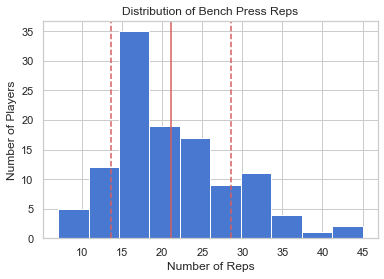

In [102]:
_ = plt.hist(draft_df['Bench Press'])
_ = plt.xlabel('Number of Reps')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Bench Press Reps')
_ = plt.axvline(bench_mean, color='r')
_ = plt.axvline(bench_mean + bench_std, color='r', linestyle='--')
_ = plt.axvline(bench_mean - bench_std, color='r', linestyle='--')

In [103]:
bench_draft = drafted['Bench Press']
bench_udraft = undrafted['Bench Press']


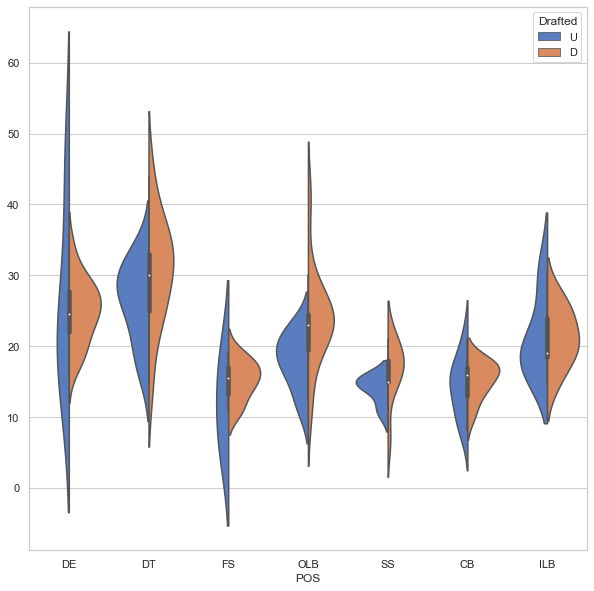

In [104]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="Bench Press", hue="Drafted", split=True)
_ = ax.set(ylabel="")

# Exploring 40 Yard Dash

In [105]:
draft_df.groupby(by='Drafted')['40 Yard'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,94.0,4.711277,0.246556,4.34,4.520,4.65,4.855,5.46
U,38.0,4.847368,0.208387,4.47,4.695,4.81,4.975,5.29


In [106]:
yard40_mean = round(np.mean(draft_df['40 Yard']), 3)
yard40_std = round(np.std(draft_df['40 Yard']), 3)
yard40_mean, yard40_std

(4.75, 0.242)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


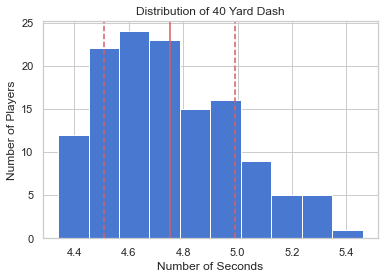

In [107]:
_ = plt.hist(draft_df['40 Yard'])
_ = plt.xlabel('Number of Seconds')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of 40 Yard Dash')
_ = plt.axvline(yard40_mean, color='r')
_ = plt.axvline(yard40_mean + yard40_std, color='r', linestyle='--')
_ = plt.axvline(yard40_mean - yard40_std, color='r', linestyle='--')

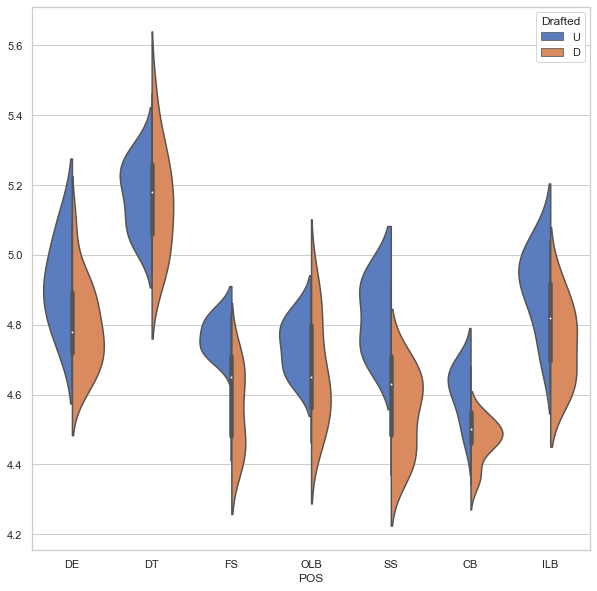

In [108]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="40 Yard", hue="Drafted", split=True)
_ = ax.set(ylabel="")

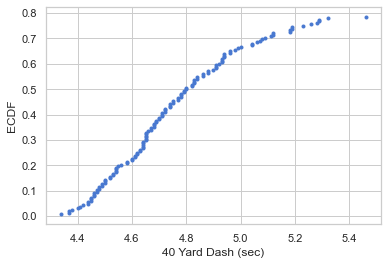

In [111]:
x_yard, y_yard = ecdf(draft_df['40 Yard'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('40 Yard Dash (sec)')
_ = plt.ylabel('ECDF')

In [29]:
yard_draft = drafted['40 Yard']
yard_udraft = undrafted['40 Yard']
np.mean(yard_draft), np.mean(yard_udraft)

(4.711276595744682, 4.847368421052632)

In [30]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 6]):
        draft_df.iloc[i, 6] = np.mean(drafted['40 Yard'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 6]):
        draft_df.iloc[i, 6] = np.mean(undrafted['40 Yard'])


In [31]:
draft_df['Permutation40'] = np.random.permutation(draft_df['40 Yard'])

draft_df.groupby(by='Drafted')['Permutation40'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,108.0,4.757828,0.197991,4.37,4.6375,4.740000,4.847368,5.29
U,60.0,4.763576,0.253078,4.34,4.5950,4.715638,4.902500,5.46


In [32]:
diff40 = []

for i in range(10000):
    perm = np.random.permutation(draft_df['40 Yard'])
    mean_diff = np.mean(perm[draft_df['Drafted'] == 'D']) - np.mean(perm[draft_df['Drafted'] == 'U'])
    diff40.append(mean_diff)

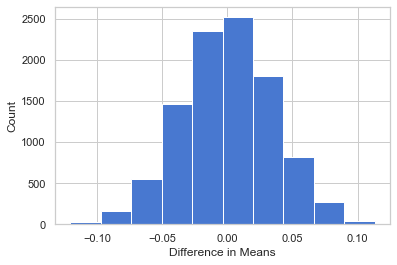

In [33]:
_ = plt.hist(diff40)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')

In [34]:
yard40_obs = np.mean(yard_draft) - np.mean(yard_udraft)
yard40_obs = abs(yard40_obs)
print(yard40_obs)

0.1360918253079504


In [36]:
pos_extreme = []
neg_extreme = []

for j in range(len(diff40)):
    if(diff40[j] >= yard40_obs):
        pos_extreme.append(diff40[j])
    elif(diff40[j] <= -yard40_obs):
        neg_extreme.append(diff40[j])
print(len(pos_extreme))
print(len(neg_extreme))

0
0


Lower than 5% reject null hypothesis

# Exploring Vertical Leap

In [37]:
draft_df.groupby(by='Drafted')['Vert Leap (in)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,90.0,36.322222,3.727601,25.0,33.50,37.00,39.375,42.0
U,38.0,34.407895,3.741396,27.0,31.25,34.25,37.000,41.5


In [38]:
vert_leap_mean = round(np.mean(draft_df['Vert Leap (in)']), 3)
vert_leap_std = round(np.std(draft_df['Vert Leap (in)']), 3)
vert_leap_mean, vert_leap_std

(35.754, 3.804)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


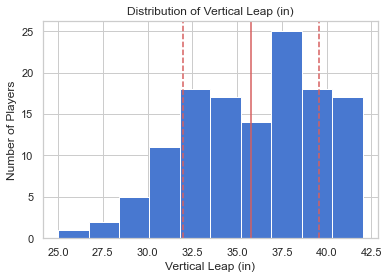

In [39]:
_ = plt.hist(draft_df['Vert Leap (in)'])
_ = plt.xlabel('Vertical Leap (in)')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Vertical Leap (in)')

_ = plt.axvline(vert_leap_mean, color='r')
_ = plt.axvline(vert_leap_mean + vert_leap_std, color='r', linestyle='--')
_ = plt.axvline(vert_leap_mean - vert_leap_std, color='r', linestyle='--')

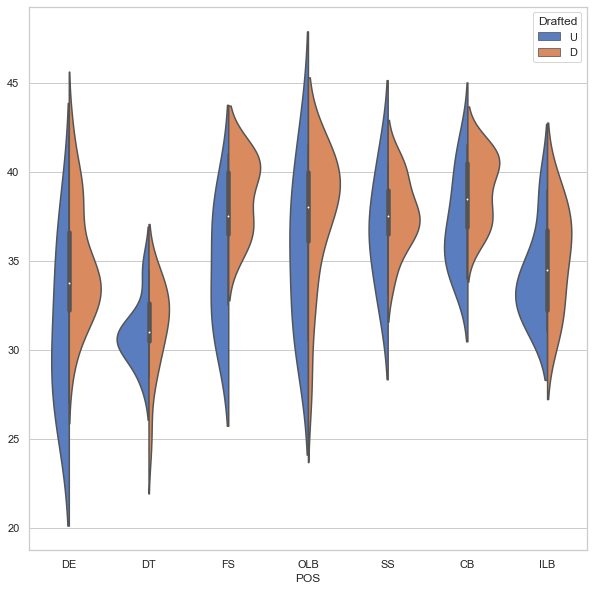

In [40]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y='Vert Leap (in)', hue="Drafted", split=True)
_ = ax.set(ylabel="")

In [41]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 8]):
        draft_df.iloc[i, 8] = np.mean(drafted['Vert Leap (in)'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 8]):
        draft_df.iloc[i, 8] = np.mean(undrafted['Vert Leap (in)'])

In [42]:
draft_df['PermutationVert'] = np.random.permutation(draft_df['Vert Leap (in)'])

draft_df.groupby(by='Drafted')['PermutationVert'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,108.0,35.812546,3.197669,25.0,34.000,36.322222,37.625,42.0
U,60.0,35.325312,3.665443,27.0,32.875,35.250000,38.250,41.5


In [43]:
diffVert = []

for i in range(10000):
    perm_vert = np.random.permutation(draft_df['Vert Leap (in)'])
    mean_vert_diff = np.mean(perm_vert[draft_df['Drafted'] == 'D']) - np.mean(perm_vert[draft_df['Drafted'] == 'U'])
    diffVert.append(mean_vert_diff)

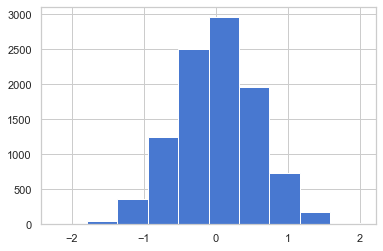

In [44]:
_ = plt.hist(diffVert)

In [45]:
obs_vert_diff = np.mean(draft_df[draft_df['Drafted'] == 'D'])['Vert Leap (in)'] - np.mean(draft_df[draft_df['Drafted'] == 'U'])['Vert Leap (in)']

obs_vert_diff = abs(obs_vert_diff)

print(obs_vert_diff)

1.914327485380113


In [46]:
pos_extreme_vert = []
neg_extreme_vert = []

for j in range(len(diffVert)):
    if(diffVert[j] >= obs_vert_diff):
        pos_extreme_vert.append(diffVert[j])
    elif(diffVert[j] <= -obs_vert_diff):
        neg_extreme_vert.append(diffVert[j])
print(len(pos_extreme_vert))
print(len(neg_extreme_vert))

2
4


Lower than 5% reject null hypothesis

# Exploring Broad Jump

In [47]:
draft_df.groupby(by='Drafted')['Broad Jump (in)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,91.0,118.714286,8.341710,96.0,113.0,120.0,125.00,133.0
U,38.0,114.263158,6.202372,100.0,109.0,114.5,117.75,127.0


In [48]:
broad_jump_mean = round(np.mean(draft_df['Broad Jump (in)']), 3)
broad_jump_std = round(np.std(draft_df['Broad Jump (in)']), 3)
broad_jump_mean, broad_jump_std

(117.403, 7.981)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


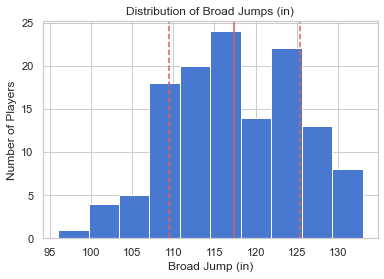

In [49]:
_ = plt.hist(draft_df['Broad Jump (in)'])
_ = plt.xlabel('Broad Jump (in)')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Broad Jumps (in)')
_ = plt.axvline(broad_jump_mean, color='r')
_ = plt.axvline(broad_jump_mean + broad_jump_std, color='r', linestyle='--')
_ = plt.axvline(broad_jump_mean - broad_jump_std, color='r', linestyle='--')

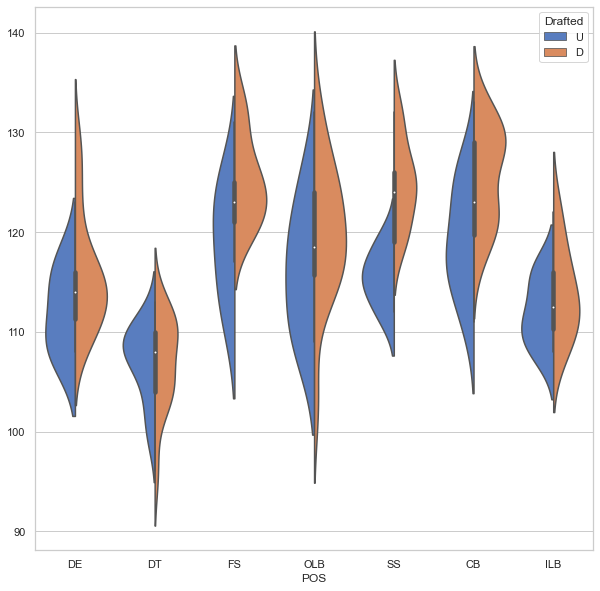

In [50]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="Broad Jump (in)", hue="Drafted", split=True)
_ = ax.set(ylabel="")

In [51]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 9]):
        draft_df.iloc[i, 9] = np.mean(drafted['Broad Jump (in)'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 9]):
        draft_df.iloc[i, 9] = np.mean(undrafted['Broad Jump (in)'])

In [52]:
draft_df['PermutationBroad'] = np.random.permutation(draft_df['Broad Jump (in)'])

draft_df.groupby(by='Drafted')['PermutationBroad'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,108.0,116.936229,7.438768,96.0,112.000000,116.0,122.25,133.0
U,60.0,117.463659,6.533530,103.0,114.197368,117.0,120.25,133.0


In [53]:
diffBroad = []

for i in range(10000):
    perm_broad = np.random.permutation(draft_df['Broad Jump (in)'])
    mean_broad_diff = np.mean(perm_broad[draft_df['Drafted'] == 'D']) - np.mean(perm_broad[draft_df['Drafted'] == 'U'])
    diffBroad.append(mean_broad_diff)

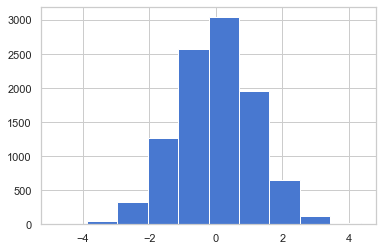

In [54]:
_ = plt.hist(diffBroad)

In [55]:
obs_broad_diff = np.mean(draft_df[draft_df['Drafted'] == 'D'])['Broad Jump (in)'] - np.mean(draft_df[draft_df['Drafted'] == 'U'])['Broad Jump (in)']

obs_broad_dff = abs(obs_broad_diff)

print(obs_broad_diff)

4.451127819548958


In [56]:
pos_extreme_broad = []
neg_extreme_broad = []

for j in range(len(diffBroad)):
    if(diffBroad[j] >= obs_broad_diff):
        pos_extreme_broad.append(diffBroad[j])
    elif(diffBroad[j] <= -obs_broad_diff):
        neg_extreme_broad.append(diffBroad[j])
print(len(pos_extreme_broad))
print(len(neg_extreme_broad))

0
1


Lower than 5% reject null hypothesis

# Exploring Shuttle Run

In [57]:
draft_df.groupby(by='Drafted')['Shuttle'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,78.0,4.269615,0.185090,3.81,4.1325,4.23,4.3975,4.80
U,30.0,4.353333,0.233819,4.07,4.1725,4.30,4.4425,4.92


In [58]:
shuttle_mean = round(np.mean(draft_df['Shuttle']), 3)
shuttle_std = round(np.std(draft_df['Shuttle']), 3)
shuttle_mean, shuttle_std

(4.293, 0.201)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


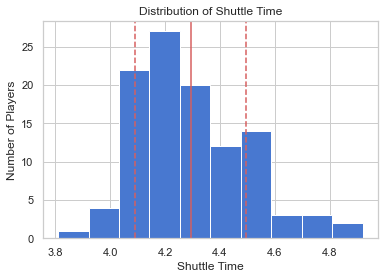

In [59]:
_ = plt.hist(draft_df['Shuttle'])
_ = plt.xlabel('Shuttle Time')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Shuttle Time')
_ = plt.axvline(shuttle_mean, color='r')
_ = plt.axvline(shuttle_mean + shuttle_std, color='r', linestyle='--')
_ = plt.axvline(shuttle_mean - shuttle_std, color='r', linestyle='--')

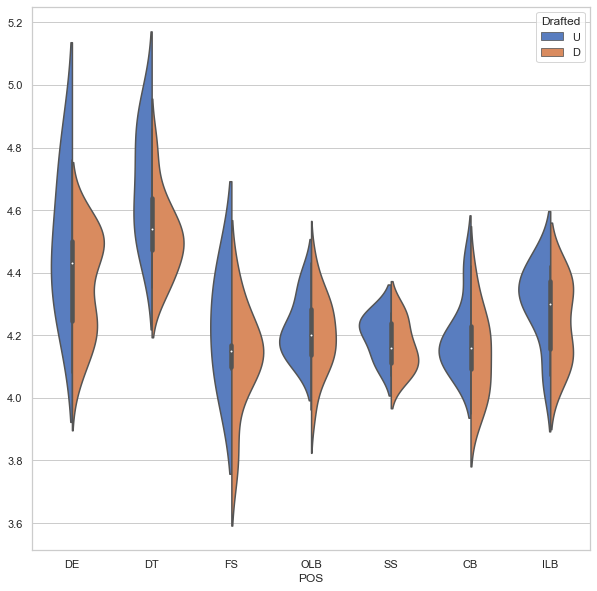

In [60]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="Shuttle", hue="Drafted", split=True)
_ = ax.set(ylabel="")

In [61]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 10]):
        draft_df.iloc[i, 10] = np.mean(drafted['Shuttle'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 10]):
        draft_df.iloc[i, 10] = np.mean(undrafted['Shuttle'])

In [62]:
draft_df['PermutationShuttle'] = np.random.permutation(draft_df['Shuttle'])

draft_df.groupby(by='Drafted')['PermutationShuttle'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,108.0,4.295909,0.168807,3.95,4.195,4.269615,4.353333,4.92
U,60.0,4.306004,0.156265,3.81,4.215,4.320000,4.353333,4.76


In [63]:
diffShuttle = []

for i in range(10000):
    perm_shuttle = np.random.permutation(draft_df['Shuttle'])
    mean_shuttle_diff = np.mean(perm_shuttle[draft_df['Drafted'] == 'D']) - np.mean(perm_shuttle[draft_df['Drafted'] == 'U'])
    diffShuttle.append(mean_shuttle_diff)

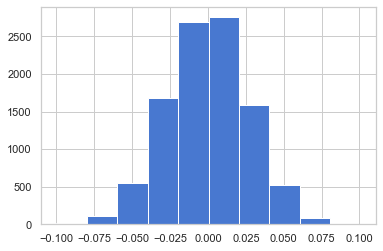

In [64]:
_ = plt.hist(diffShuttle)

In [65]:
obs_shuttle_diff = np.mean(draft_df[draft_df['Drafted'] == 'D'])['Shuttle'] - np.mean(draft_df[draft_df['Drafted'] == 'U'])["Shuttle"]

obs_shuttle_diff = abs(obs_shuttle_diff)

print(obs_shuttle_diff)

0.08371794871794336


In [66]:
pos_extreme_shuttle = []
neg_extreme_shuttle = []

for j in range(len(diffShuttle)):
    if(diffShuttle[j] >= obs_shuttle_diff):
        pos_extreme_shuttle.append(diffShuttle[j])
    elif(diffShuttle[j] <= -obs_shuttle_diff):
        neg_extreme_shuttle.append(diffShuttle[j])
print(len(pos_extreme_shuttle))
print(len(neg_extreme_shuttle))

5
7


Lower than 5% reject null hypothesis

# Exploring Three Cone Drill

In [78]:
draft_df.groupby(by='Drafted')['3Cone'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,108.0,7.201733,0.311935,6.63,6.997500,7.201733,7.280000,8.28
U,60.0,7.308077,0.234029,6.81,7.303558,7.308077,7.308077,8.12


In [79]:
cone3_mean = round(np.mean(draft_df['3Cone']), 3)
cone3_std = round(np.std(draft_df['3Cone']), 3)
cone3_mean, cone3_std

(7.24, 0.289)

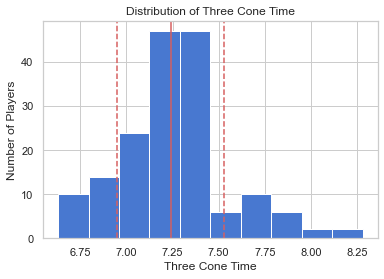

In [80]:
_ = plt.hist(draft_df['3Cone'])
_ = plt.xlabel('Three Cone Time')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Three Cone Time')
_ = plt.axvline(cone3_mean, color='r')
_ = plt.axvline(cone3_mean + cone3_std, color='r', linestyle='--')
_ = plt.axvline(cone3_mean - cone3_std, color='r', linestyle='--')

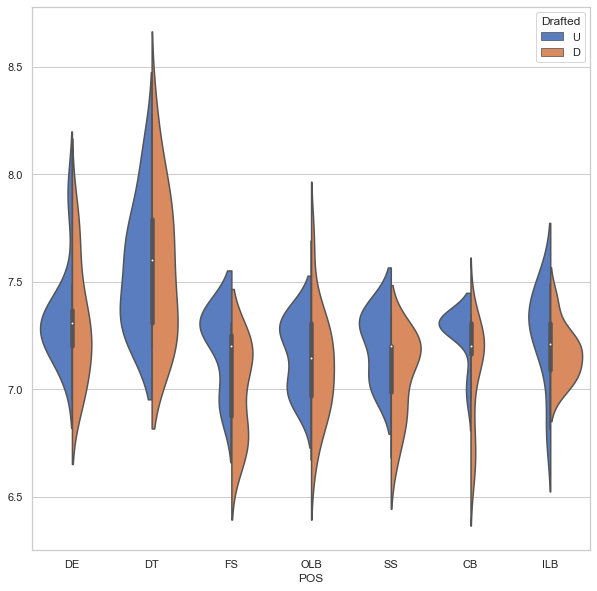

In [81]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="3Cone", hue="Drafted", split=True)
_ = ax.set(ylabel="")

In [82]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 11]):
        draft_df.iloc[i, 11] = np.mean(drafted['3Cone'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 11]):
        draft_df.iloc[i, 11] = np.mean(undrafted['3Cone'])

In [83]:
draft_df['PermutationCone'] = np.random.permutation(draft_df['3Cone'])

draft_df.groupby(by='Drafted')['PermutationCone'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,108.0,7.247378,0.303335,6.65,7.05,7.230000,7.308077,8.28
U,60.0,7.225917,0.267317,6.63,7.09,7.201733,7.308077,8.06


In [84]:
diffCone = []

for i in range(10000):
    perm_cone = np.random.permutation(draft_df['3Cone'])
    mean_cone_diff = np.mean(perm_cone[draft_df['Drafted'] == 'D']) - np.mean(perm_cone[draft_df['Drafted'] == 'U'])
    diffCone.append(mean_cone_diff)

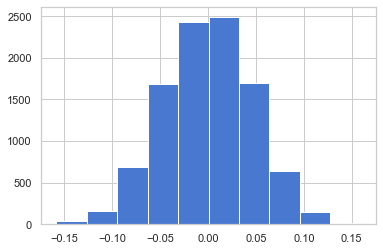

In [85]:
_ = plt.hist(diffCone)

In [86]:
obs_cone_diff = np.mean(draft_df[draft_df['Drafted'] == 'D'])['3Cone'] - np.mean(draft_df[draft_df['Drafted'] == 'U'])['3Cone']

obs_cone_diff = abs(obs_cone_diff)

print(obs_cone_diff)

0.1063435897435907


In [87]:
pos_extreme_cone = []
neg_extreme_cone = []

for j in range(len(diffCone)):
    if(diffCone[j] >= obs_cone_diff):
        pos_extreme_cone.append(diffCone[j])
    elif(diffCone[j] <= -obs_cone_diff):
        neg_extreme_cone.append(diffCone[j])
print(len(pos_extreme_cone))
print(len(neg_extreme_cone))

93
115


Lower than 5% reject the null hypothesis

In [88]:
draft_df.corr()

,Year,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Round,...,CarAV,DrAV,Solo,Int,Sacks,Permutation40,PermutationVert,PermutationBroad,PermutationShuttle,PermutationCone
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height (in),NaN,1.000000,0.642057,0.387461,0.344016,-0.300082,-0.299736,0.322828,0.316469,-0.012376,...,-0.000314,0.088967,-0.247874,-0.321730,0.220018,-0.045392,0.002646,0.097508,-0.077715,-0.105375
Weight (lbs),NaN,0.642057,1.000000,0.707157,0.707069,-0.525628,-0.601679,0.542388,0.569454,0.068643,...,0.043118,0.167902,-0.265556,-0.346832,0.163380,0.062332,0.023317,0.006806,-0.044507,-0.109110
40 Yard,NaN,0.387461,0.707157,1.000000,0.476696,-0.729639,-0.812000,0.630407,0.664550,0.195083,...,0.029552,0.156143,-0.232514,-0.378827,0.126430,0.071095,-0.068690,-0.017191,0.031844,-0.130954
Bench Press,NaN,0.344016,0.707069,0.476696,1.000000,-0.284253,-0.390276,0.414970,0.424381,-0.043204,...,0.170382,0.206227,-0.128864,-0.300647,0.240934,0.142402,0.097905,-0.031591,-0.009143,-0.090352
Vert Leap (in),NaN,-0.300082,-0.525628,-0.729639,-0.284253,1.000000,0.796936,-0.571997,-0.604430,-0.145970,...,-0.038362,-0.123163,0.178686,0.104938,-0.107921,-0.031303,0.074104,-0.004285,-0.046960,0.100572
Broad Jump (in),NaN,-0.299736,-0.601679,-0.812000,-0.390276,0.796936,1.000000,-0.588959,-0.645854,-0.218306,...,0.018622,-0.112959,0.273976,0.368982,-0.085435,-0.089947,0.082144,0.106292,-0.023155,0.156664
Shuttle,NaN,0.322828,0.542388,0.630407,0.414970,-0.571997,-0.588959,1.000000,0.766283,0.184711,...,0.031308,0.057071,-0.208892,-0.116525,0.204624,-0.048193,-0.039631,0.048388,-0.030240,-0.083353
3Cone,NaN,0.316469,0.569454,0.664550,0.424381,-0.604430,-0.645854,0.766283,1.000000,0.185078,...,-0.021720,0.074372,-0.246701,-0.165982,0.062263,-0.015939,0.023612,-0.034670,0.020047,-0.124023
Round,NaN,-0.012376,0.068643,0.195083,-0.043204,-0.145970,-0.218306,0.184711,0.185078,1.000000,...,-0.498377,-0.410534,-0.454208,-0.197394,-0.257054,-0.011428,-0.101856,0.014049,0.168040,-0.168977


In [89]:
#sns.pairplot(draft_df)

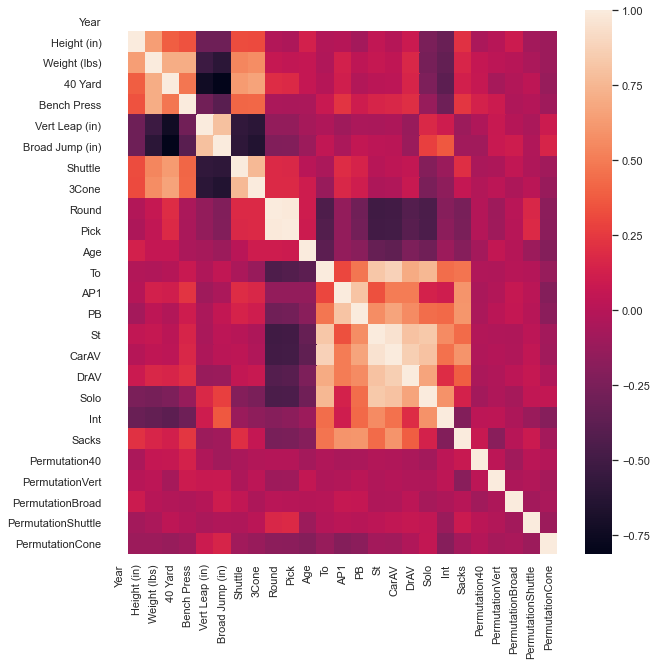

In [90]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(draft_df.corr())

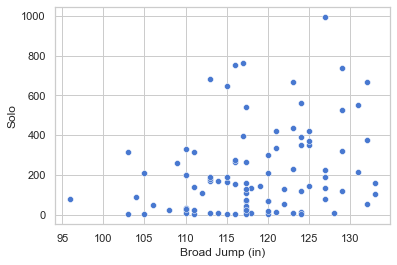

In [79]:
_ = sns.scatterplot(x='Broad Jump (in)', y='Solo', data=draft_df)

In [80]:
y = draft_df[['Solo']]
X = draft_df[['Broad Jump (in)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(126, 1)
(42, 1)
(126, 1)
(42, 1)


In [82]:
rModel = linear_model.LinearRegression(normalize=True)

In [83]:
rModel.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').